## AGE PROGRESSION

Authors: Bonface Mutua, Grace Anyango, Jamleck Mathenge, Medrine Waeni, Ryan Musasia, Susan Mungai, Willy Angole


## 1. BUSINESS UNDERSTANDING

### 1.1 Overview


Age progression is a technique used to predict what a person may look like in the future. This technique is often used in forensic psychology to help investigators identify missing persons or suspects. One can also use it for personal or professional reasons, such as creating a visual representation of what a child may look like as they grow older or creating a marketing campaign for an age-related product.

Age progression models can be beneficial for a variety of reasons:

* Help families and investigators reunite with missing loved ones

* Identify suspects in criminal cases

* By mimicking the aging process in a controlled setting for healthcare, researchers may evaluate the effectiveness of various interventions and make better educated choices about which treatments are most likely to be helpful.

* It might be employed as a teaching and learning aid to assist scholars in comprehending the physical impacts of aging as well as the underlying mechanisms that underlie the aging process.

* It can be used to create more realistic and engaging marketing campaigns for age-related products or services.

Overall, the use of age progression models can provide valuable insights and be beneficial in various settings. By using these models, individuals and organizations can better understand and anticipate the effects of aging, which can help them make more informed decisions and improve their overall well-being.



### 1.1.2 Problem statement

Security officers may come across people whose looks have altered dramatically since their last known photograph, making it challenging to correctly identify them using conventional methods as the population ages. By employing algorithms to forecast how a person's look is expected to vary over time, an age progression machine learning model has the ability to address this issue and make it easier for security staff to recognize people and respond to potential security risks as well as find missing individuals.


### 1.1.3 Specific Objectives

* Displaying the age progression of an image to the specified age 

* Deploy a face aging algorithm that can be used in real world application

* To use models that increase the accuracy of the project

* Create user-friendly interfaces that allow law enforcement officials and other users to easily apply the model to their use cases 


### 1.1.4 Business Success Criteria

Build a model that predicts, with an accuracy 70%

## DATA UNDERSTANDING

### Description of columns in the file:

* [age] is an integer from 0 to 116, indicating the age

* [gender] is either 0 (male) or 1 (female)

* [race] is an integer from 0 to 4, denoting White, Black, Asian, Indian, and Others (like Hispanic, Latino, Middle Eastern).

* [date&time] is in the format of yyyymmddHHMMSSFFF, showing the date and time an image was collected to UTKFace

In [2]:
#importing libraries
import os # to access files in the opereating system
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

In [3]:
#Accessing all image file names to get ages
utkface_path = ('data/UTKFace')
utkface_image_names = os.listdir(utkface_path)

In [109]:
# function to generate the labels from the image file names according to the format given above.

def age_gender_race_split(image_name):
    
    """ This function generates labels from the image file names"""

    image_labels = image_name.split('_')
    age = image_labels[0]
    gender = image_labels[1]
    race = image_labels[2]
    timestamp=image_labels[-1]
    

    return (age, gender, race, timestamp,image_name)
     

In [112]:
#using for loops to store labels in relevant arrays relevant 
age_labels = np.array([])
gender_labels = np.array([])
race_labels = np.array([])
timestamp_labels=np.array([])
image_labels = np.array([])

for image in utkface_image_names:
    age, gender, race,timestamp,image_names = age_gender_race_split(image)
    age_labels = np.append(age_labels, age)
    gender_labels = np.append(gender_labels, gender)
    race_labels = np.append(race_labels, race)
    timestamp_labels=np.append(timestamp_labels, timestamp)
    image_labels=np.append(image_labels, image_names)

In [113]:
age = pd.Series(age_labels, name = 'Ages')
gender = pd.Series(gender_labels, name = 'Genders')
race = pd.Series(race_labels, name="Races")
timestamp=pd.Series(timestamp_labels, name="Timestamp")
image_names=pd.Series(image_labels, name="Image Name")

df = pd.concat([age, race, gender, timestamp,image_names], axis=1)
df.head()

,Ages,Races,Genders,Timestamp,Image Name
0,100,0,1,20170110183726390.jpg.chip.jpg,100_1_0_20170110183726390.jpg.chip.jpg
1,100,2,1,20170105174847679.jpg.chip.jpg,100_1_2_20170105174847679.jpg.chip.jpg
2,101,2,1,20170105174739309.jpg.chip.jpg,101_1_2_20170105174739309.jpg.chip.jpg
3,10,0,0,20161220222308131.jpg.chip.jpg,10_0_0_20161220222308131.jpg.chip.jpg
4,10,0,0,20170103200329407.jpg.chip.jpg,10_0_0_20170103200329407.jpg.chip.jpg


In [7]:
#getting value counts for Age column
age_counts=df['Ages'].value_counts()
age_counts

1      1112
2       475
3       284
26      279
4       260
       ... 
110       2
99        2
100       2
91        1
101       1
Name: Ages, Length: 99, dtype: int64

In [8]:
#getting value counts for Race
race_counts=df['Races'].value_counts()
race_counts

0                                 5265
2                                 1553
3                                 1452
4                                 1103
1                                  405
20170109142408075.jpg.chip.jpg       1
20170109150557335.jpg.chip.jpg       1
Name: Races, dtype: int64

We have noticed there are 3 rows that do not follow naming convention. We will handle this in Data preparation

In [9]:
gender_counts= df['Genders'].value_counts()
gender_counts

1    5407
0    4372
3       1
Name: Genders, dtype: int64

In [10]:
class DataUnderstanding(object):
    """This is a class that does basic data understanding"""
    def __init__(self, df):
        self.shape = df.shape
        self.info = df.info
        self.duplicates = df.duplicated().sum()
        self.missing = df.isna().sum()
        self.types = df.dtypes


In [11]:
#instantiating the classes
dataund= DataUnderstanding(df)

In [12]:
#Getting the shape of the dataset
print(f"shape:{dataund.shape}")

shape:(9780, 4)


In [13]:
#getting the info of the data
print(dataund.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9780 entries, 0 to 9779
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Ages       9780 non-null   object
 1   Races      9780 non-null   object
 2   Genders    9780 non-null   object
 3   Timestamp  9780 non-null   object
dtypes: object(4)
memory usage: 305.8+ KB
None


we can see that the dataset contains 23708 rows and 3 columns.The 3 columns has data type  string.We can also see there are no null values.

In [14]:
#getting the missing values
dataund.missing

Ages         0
Races        0
Genders      0
Timestamp    0
dtype: int64

There are no missing values.

In [15]:
#checking the data types
dataund.types

Ages         object
Races        object
Genders      object
Timestamp    object
dtype: object

The 3 columns have object data type

In [16]:
#checking for duplicates
print(f"Duplictes:{dataund.duplicates.sum()}")

Duplictes:0


There are no duplicates this is attributed to the inclusion of date and time column.

## DATA PREPARATION

In [115]:
#dropping rows 
df = df[df.Races.isin(["0","1","2","3","4"])]
dataund= DataUnderstanding(df)
print(f"Shape:{dataund.shape}")


Shape:(9778, 5)


After dropping the three rows we have 23705 rows.

In [116]:
for time in timestamp:
  parts = time.split(".")
  date_time = parts[0]
  

In [117]:
df

,Ages,Races,Genders,Timestamp,Image Name
0,100,0,1,20170110183726390.jpg.chip.jpg,100_1_0_20170110183726390.jpg.chip.jpg
1,100,2,1,20170105174847679.jpg.chip.jpg,100_1_2_20170105174847679.jpg.chip.jpg
2,101,2,1,20170105174739309.jpg.chip.jpg,101_1_2_20170105174739309.jpg.chip.jpg
3,10,0,0,20161220222308131.jpg.chip.jpg,10_0_0_20161220222308131.jpg.chip.jpg
4,10,0,0,20170103200329407.jpg.chip.jpg,10_0_0_20170103200329407.jpg.chip.jpg
...,...,...,...,...,...
9775,9,3,1,20161220222856346.jpg.chip.jpg,9_1_3_20161220222856346.jpg.chip.jpg
9776,9,3,1,20170104222949455.jpg.chip.jpg,9_1_3_20170104222949455.jpg.chip.jpg
9777,9,4,1,20170103200637399.jpg.chip.jpg,9_1_4_20170103200637399.jpg.chip.jpg
9778,9,4,1,20170103200814791.jpg.chip.jpg,9_1_4_20170103200814791.jpg.chip.jpg


In [118]:
#splitting the timestamp column
import datetime
date = []
for time in df["Timestamp"]:
    parts = time.split(".")
    date_time = parts[0]
    date_time = date_time.split(" ")
    date_time = date_time[-1][:8]
    date.append(date_time)

df['Timestamp'] = date  
df["Timestamp"]= pd.to_datetime(df['Timestamp'], infer_datetime_format=True)



In [119]:
# Create the Year, month and day columns
df['Year'] = df['Timestamp'].dt.year
df['Month'] = df['Timestamp'].dt.month
df['Day'] = df['Timestamp'].dt.day
df.head()

,Ages,Races,Genders,Timestamp,Image Name,Year,Month,Day
0,100,0,1,2017-01-10,100_1_0_20170110183726390.jpg.chip.jpg,2017,1,10
1,100,2,1,2017-01-05,100_1_2_20170105174847679.jpg.chip.jpg,2017,1,5
2,101,2,1,2017-01-05,101_1_2_20170105174739309.jpg.chip.jpg,2017,1,5
3,10,0,0,2016-12-20,10_0_0_20161220222308131.jpg.chip.jpg,2016,12,20
4,10,0,0,2017-01-03,10_0_0_20170103200329407.jpg.chip.jpg,2017,1,3


In [120]:
# Checking the last columns of the dataset
df.tail()

,Ages,Races,Genders,Timestamp,Image Name,Year,Month,Day
9775,9,3,1,2016-12-20,9_1_3_20161220222856346.jpg.chip.jpg,2016,12,20
9776,9,3,1,2017-01-04,9_1_3_20170104222949455.jpg.chip.jpg,2017,1,4
9777,9,4,1,2017-01-03,9_1_4_20170103200637399.jpg.chip.jpg,2017,1,3
9778,9,4,1,2017-01-03,9_1_4_20170103200814791.jpg.chip.jpg,2017,1,3
9779,9,4,1,2017-01-03,9_1_4_20170103213057382.jpg.chip.jpg,2017,1,3


In [121]:
# Checking for missing values
dataund= DataUnderstanding(df)
dataund.missing

Ages          0
Races         0
Genders       0
Timestamp     0
Image Name    0
Year          0
Month         0
Day           0
dtype: int64

In [122]:
# Checking for duplicates
print(f"Duplicates:{dataund.duplicates.sum()}")

Duplicates:0


The duplicates come about since the majority of the images were taken on the same day

In [123]:
# Proper object types
convert_dict = {'Ages': int,
                'Races': int,
                "Genders": int
                }
 
df = df.astype(convert_dict)
df.head(10)

,Ages,Races,Genders,Timestamp,Image Name,Year,Month,Day
0,100,0,1,2017-01-10,100_1_0_20170110183726390.jpg.chip.jpg,2017,1,10
1,100,2,1,2017-01-05,100_1_2_20170105174847679.jpg.chip.jpg,2017,1,5
2,101,2,1,2017-01-05,101_1_2_20170105174739309.jpg.chip.jpg,2017,1,5
3,10,0,0,2016-12-20,10_0_0_20161220222308131.jpg.chip.jpg,2016,12,20
4,10,0,0,2017-01-03,10_0_0_20170103200329407.jpg.chip.jpg,2017,1,3
5,10,0,0,2017-01-03,10_0_0_20170103200522151.jpg.chip.jpg,2017,1,3
6,10,0,0,2017-01-03,10_0_0_20170103233459275.jpg.chip.jpg,2017,1,3
7,10,0,0,2017-01-04,10_0_0_20170104013211746.jpg.chip.jpg,2017,1,4
8,10,0,0,2017-01-10,10_0_0_20170110215927291.jpg.chip.jpg,2017,1,10
9,10,0,0,2017-01-10,10_0_0_20170110220033115.jpg.chip.jpg,2017,1,10


#### EXPLORATORY DATA ANALYSIS

In [26]:
# EDA class
class EdaAnalysis:    
    def univariate(self,df,col1):
        """ A function that does univariate analysis"""
        plt.figure(figsize=(16,8))
        sns.countplot(x=col1,data=df)
        plt.title(f'No of images per {col1}')
        plt.xlabel(col1)
        plt.xticks(rotation=45)
        plt.show()
        
    def bivariate(self,df,col1, col2):
        """ A function that does bivariate analysis"""
        plt.figure(figsize=(16,8))
        sns.countplot(x=col1, data= df,hue=col2)
        plt.title(f'{col1} on {col2}')
        plt.ylabel(f'count of{col1}')
        
    def multivariate_analysis(self, df):
      
        """Perform multivariate analysis on the data"""
        # Calculate the pairwise Pearson correlation coefficients for all columns
        corr_matrix = df.corr()
        # Plot a heatmap to visualize the correlations
        sns.heatmap(corr_matrix)

In [27]:
# Instantiation 
graph = EdaAnalysis()

##### Univariate Analysis

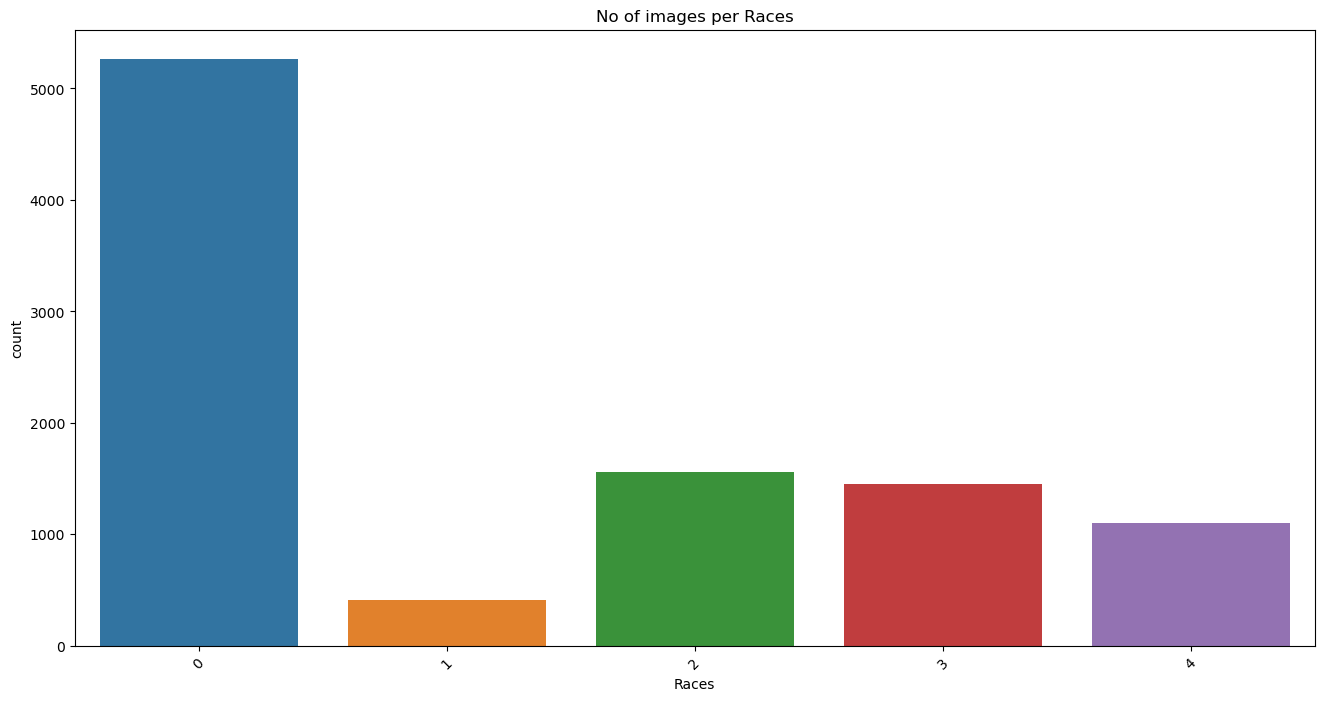

In [28]:
graph.univariate(df, 'Races')

From the bar chats above, the Whites, Blacks, Asians, Indians, and Other races are denoted by 0, 1, 2, 3 and 4 respectively.

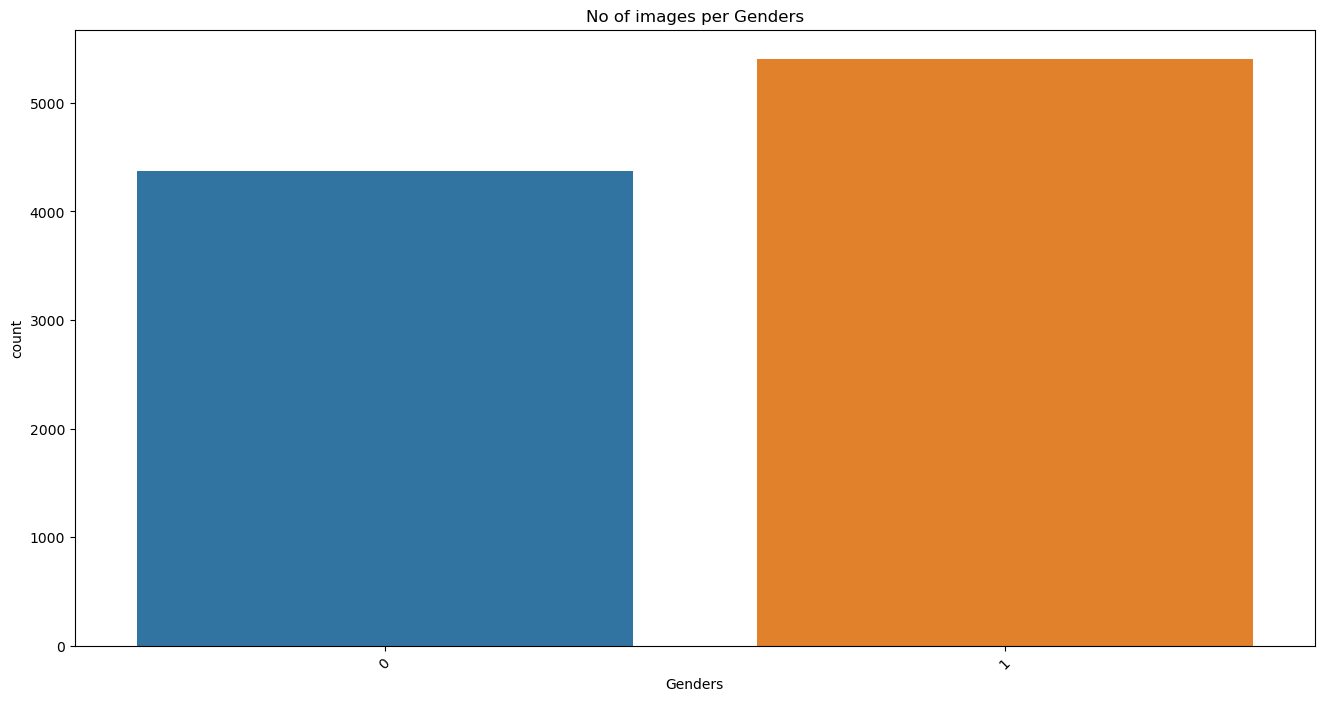

In [29]:
graph.univariate(df, 'Genders')

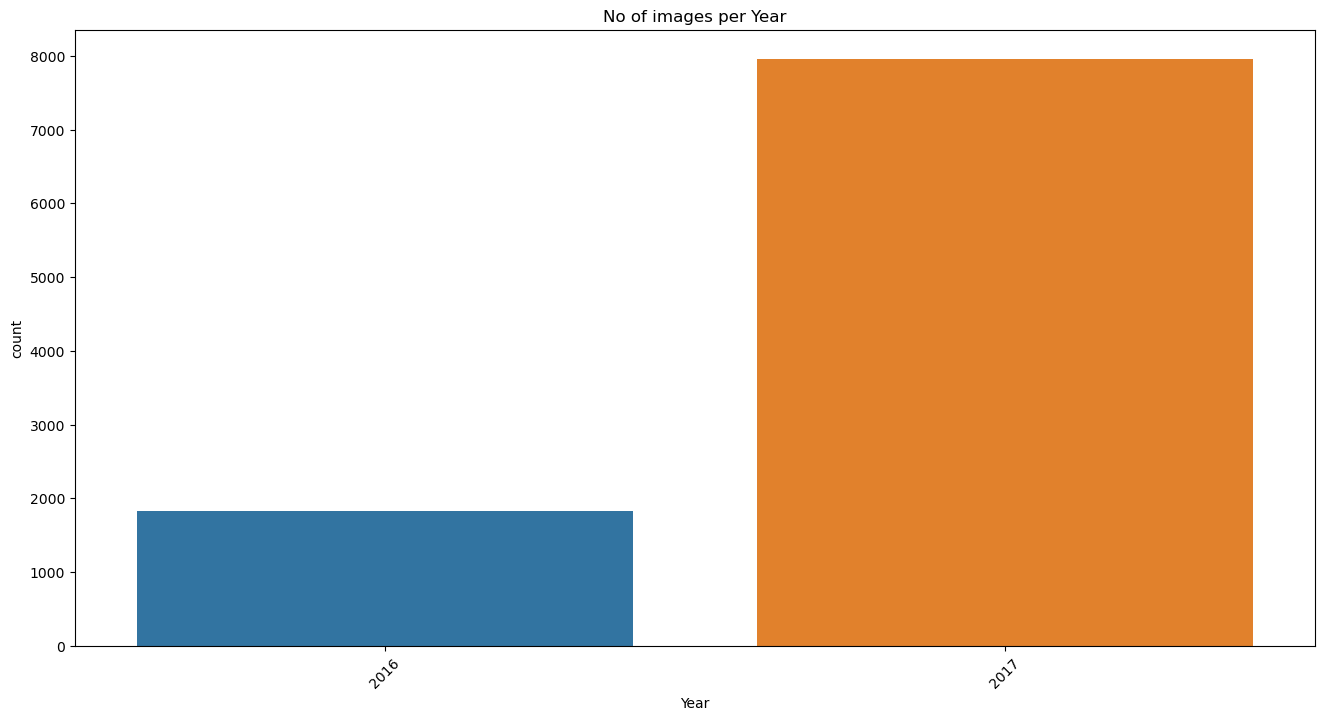

In [30]:
graph.univariate(df, 'Year')

The photos were taken across two years. The majority of the photos, 21883 were taken in 2017 while the remaining 1821 were taken in 2016.

0 represents males while 1 represents females.

In [31]:
col = 'Ages'

# Create the bins
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 120]

# Create the names for the bins
names = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70' , '71-80', '81-90', 'Above 90' ]

# Bin the data
df['Ages_binned'] = pd.cut(df[col], bins, labels=names)

# View the binned data
print(df['Ages_binned'])

0       Above 90
1       Above 90
2       Above 90
3           0-10
4           0-10
          ...   
9775        0-10
9776        0-10
9777        0-10
9778        0-10
9779        0-10
Name: Ages_binned, Length: 9778, dtype: category
Categories (10, object): ['0-10' < '11-20' < '21-30' < '31-40' ... '61-70' < '71-80' < '81-90' < 'Above 90']


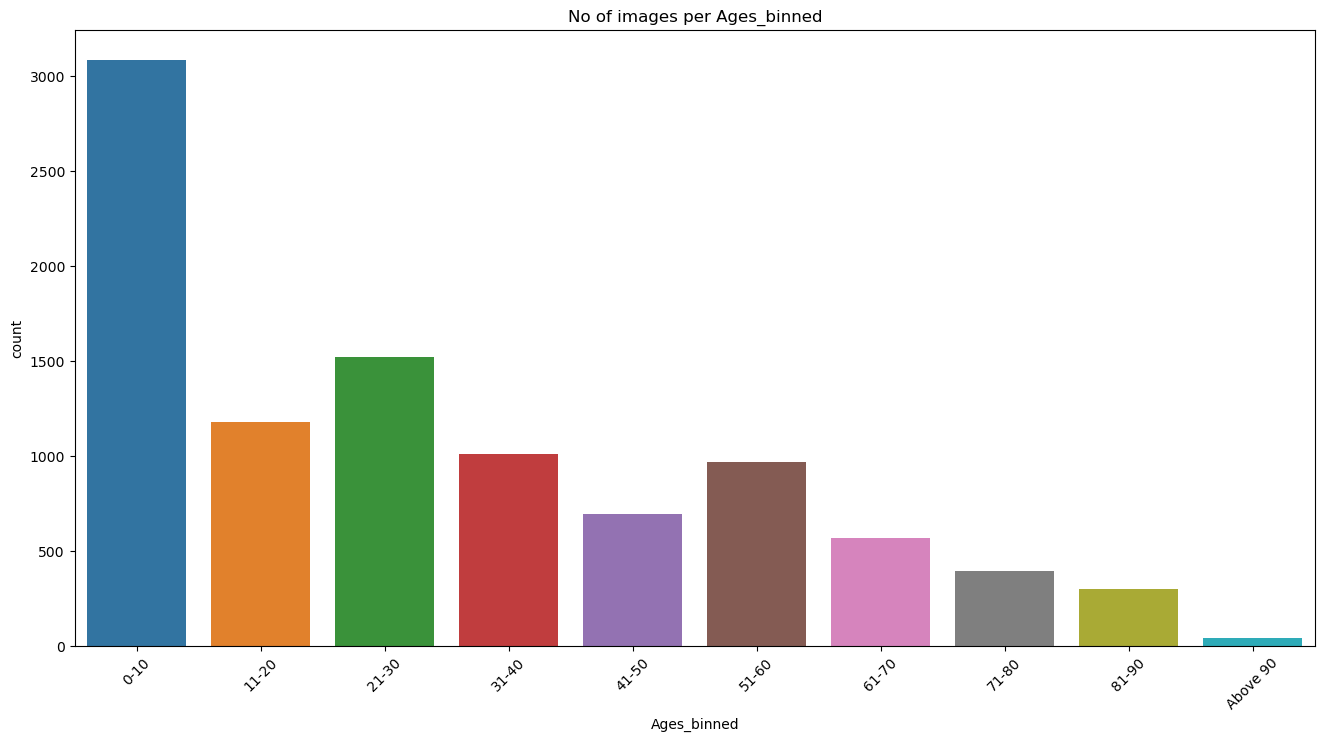

In [32]:
graph.univariate(df, 'Ages_binned')

The bar charts above illustrate the discripancies in the age distributions. The majority of the images came from 21 to 30 year old group followed by 31-40 years old group. Lesser images came from the old, above ninety years.

##### Bivariate Analysis

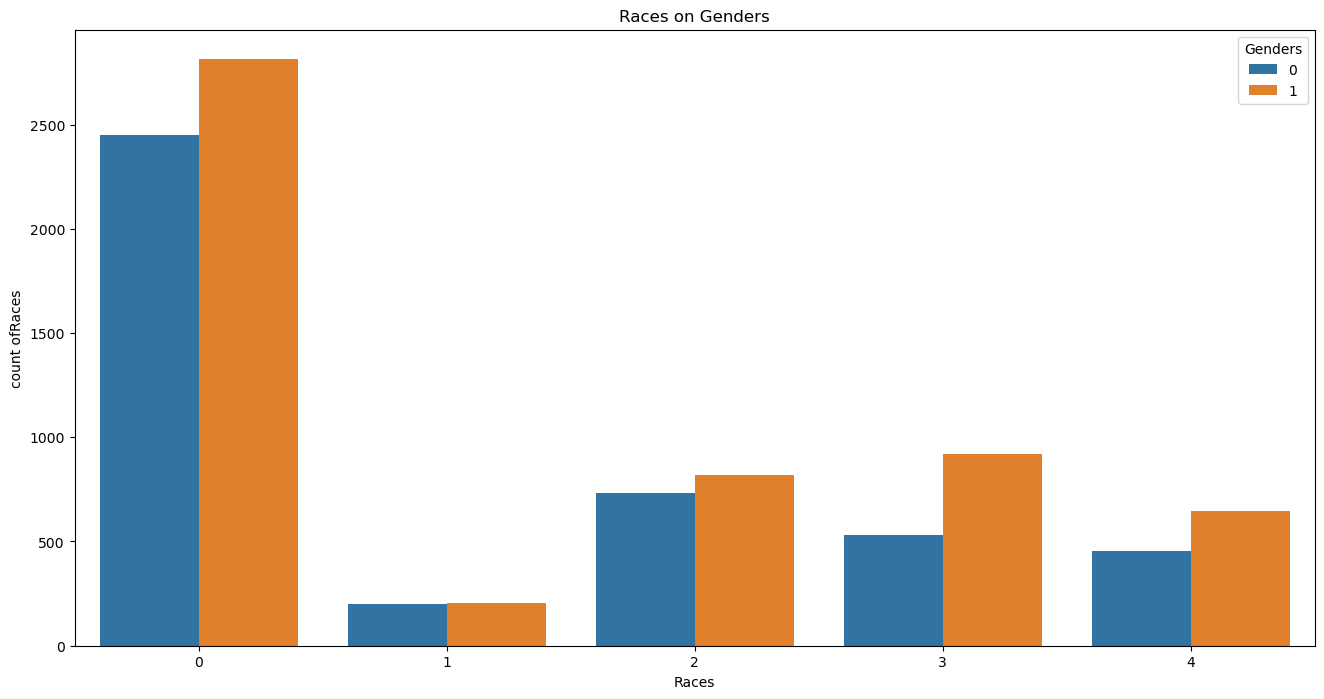

In [33]:
graph.bivariate(df, 'Races' , 'Genders')

While the data generally entails more males than females, the imbalance only reflects across three races; whites, blacks and Indians. The number of females across the remaining two groups are higher than that of men.

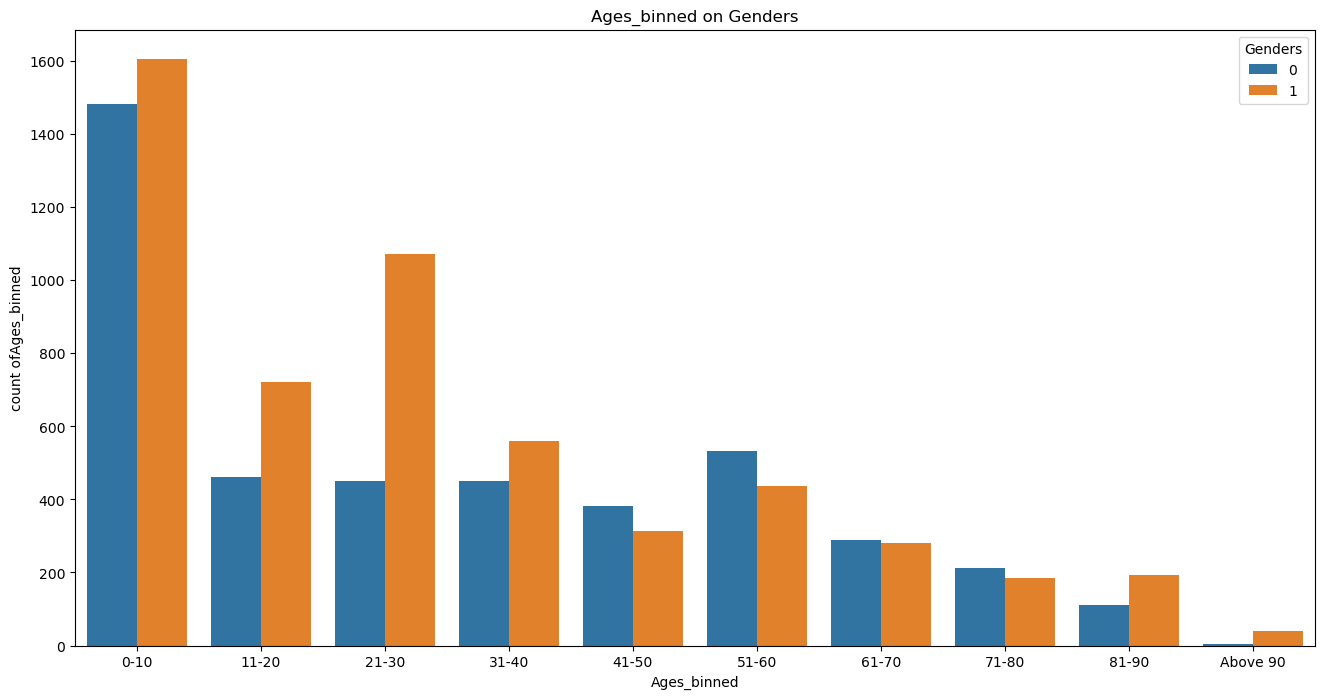

In [34]:
graph.bivariate(df, 'Ages_binned' , 'Genders')

Between class ages 0-10, 10-20, 21-30 and 81-90 there are more females compared to males while the remaining classes portray a differing trend. there are more females than males.

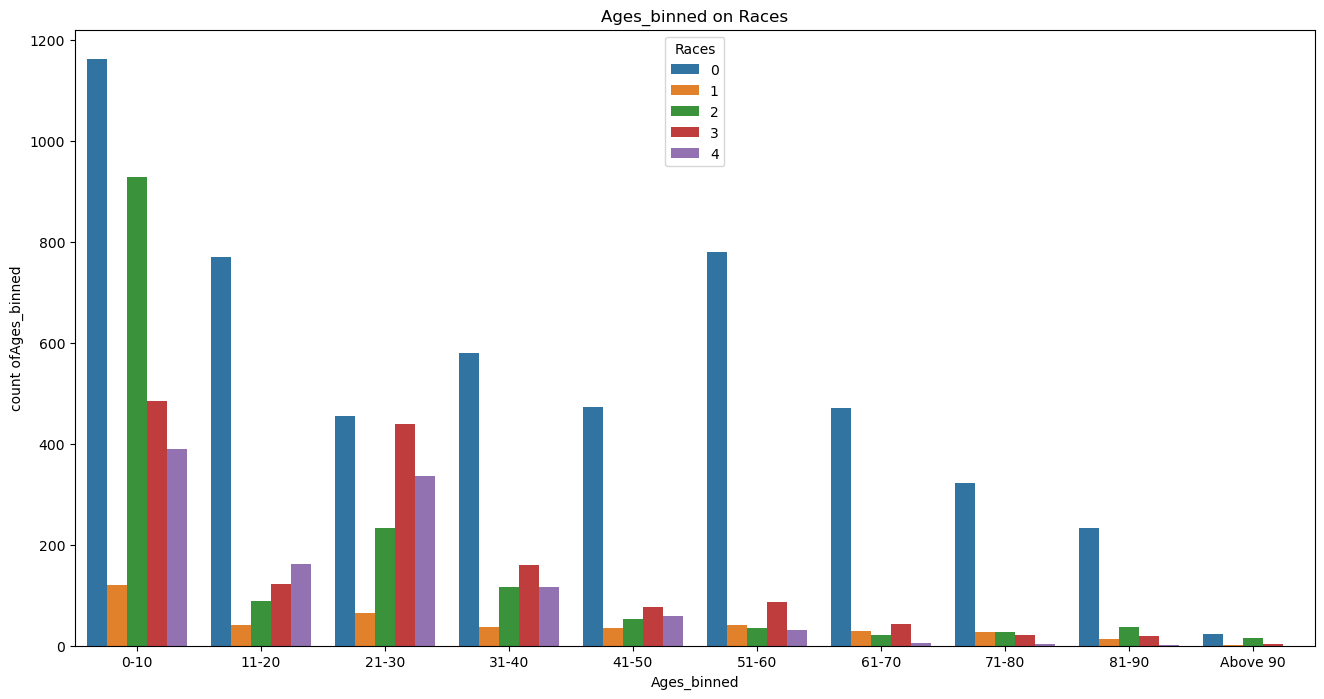

In [35]:
graph.bivariate(df, 'Ages_binned' , 'Races')

The whites are the majority in this dataset which is portrayed along all classes. 

#### Multivariate 

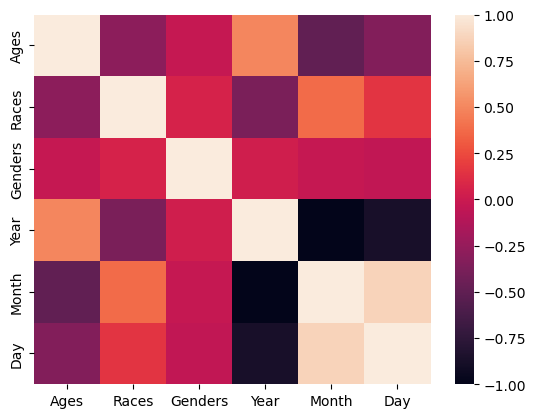

In [36]:
corr_matrix = df.corr()
# Plot a heatmap to visualize the correlations
sns.heatmap(corr_matrix);

We need to prepare the data inorder to fit our modeling process.

## DATA PREPROCESSING

In [37]:
import glob
data_dir = os.getcwd()
file_pattern = os.path.join(data_dir, "data", "UTKFace","*.jpg")
file_names = glob.glob(file_pattern)


In [72]:
from sklearn.model_selection import train_test_split

# Split the filenames into training and test sets
train_set, val_set = train_test_split(file_names, test_size=0.2, random_state=230)
print("""
    Number of training images: {}
    Number of validation images: {}
""".format(len(train_set),len(val_set)))


    Number of training images: 7824
    Number of validation images: 1956



In [59]:
from tqdm import tqdm
from keras.utils import load_img
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image,color_mode="rgb")
        img = img.resize((128, 128))
        img = np.array(img)
        features.append(img)        
    features = np.array(features)
    return features

In [61]:
X = extract_features(file_names)
X.shape

100%|██████████| 9780/9780 [00:34<00:00, 284.73it/s]


(9780, 128, 128, 3)

In [63]:
# Normalize the images
X = X/255.0

In [64]:
df.head()

,Ages,Races,Genders,Timestamp,Year,Month,Day,Ages_binned
0,100,0,1,2017-01-10,2017,1,10,Above 90
1,100,2,1,2017-01-05,2017,1,5,Above 90
2,101,2,1,2017-01-05,2017,1,5,Above 90
3,10,0,0,2016-12-20,2016,12,20,0-10
4,10,0,0,2017-01-03,2017,1,3,0-10


In [39]:
import tensorflow as tf
from tensorflow import keras
from keras.utils import image_dataset_from_directory

In [41]:
batch_size = 32
img_height = 180
img_width = 180

In [52]:
train_ds = image_dataset_from_directory(
    r"data/UTKFace/",
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode=None)

Found 9780 files belonging to 1 classes.
Using 7824 files for training.


In [71]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  r"data/UTKFace/",
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  label_mode=None)

Found 9780 files belonging to 1 classes.
Using 1956 files for validation.


In [87]:
len(file_names)

9780

In [88]:
list_ds = tf.data.Dataset.list_files(r"data/UTKFace/*.jpg",shuffle=False)
list_ds = list_ds.shuffle(len(file_names), reshuffle_each_iteration=False)
list_ds

<ShuffleDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>

In [90]:
val_size = int(len(file_names) * 0.2)
train_ds = list_ds.skip(val_size)
val_ds = list_ds.take(val_size)
print(tf.data.experimental.cardinality(train_ds).numpy())
print(tf.data.experimental.cardinality(val_ds).numpy())

7824
1956


In [131]:
len(utkface_image_names)

9780

In [132]:
parts = tf.strings.split(utkface_image_names, os.path.sep)
parts[-2]
parts

<tf.RaggedTensor [[b'100_1_0_20170110183726390.jpg.chip.jpg'],
 [b'100_1_2_20170105174847679.jpg.chip.jpg'],
 [b'101_1_2_20170105174739309.jpg.chip.jpg'],
 ...,
 [b'9_1_4_20170103200637399.jpg.chip.jpg'],
 [b'9_1_4_20170103200814791.jpg.chip.jpg'],
 [b'9_1_4_20170103213057382.jpg.chip.jpg']]>

In [ ]:
train_generator = train_ds.flow_from_dataframe(train_ds, 
                                                    directory=data_dir, 
                                                    x_col = 'file_name', 
                                                    y_col = ['age', 'gender', 'ethnicity'], 
                                                    target_size = (img_height, img_width),
                                                    class_mode = 'multi_output',
                                                    batch_size = batch_size,
                                                    seed = 37)